# Describe data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Studies

In [2]:
df_study = pd.read_csv('../data_transform/ICPSR_STUDIES.csv')
df_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10610 entries, 0 to 10609
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STUDY                  10610 non-null  int64  
 1   DOI                    10610 non-null  object 
 2   NAME                   10610 non-null  object 
 3   SERIES                 6683 non-null   float64
 4   SERIES_TITLE           6683 non-null   object 
 5   PRINCIPAL_INV          10610 non-null  object 
 6   DESCRIPTION            10610 non-null  object 
 7   RELEASE_DATE           10610 non-null  object 
 8   FUNDING_AGENCY         5256 non-null   object 
 9   GEO                    9956 non-null   object 
 10  TERMS                  10155 non-null  object 
 11  OWNER                  10610 non-null  object 
 12  CURATION_LEVEL         1125 non-null   object 
 13  SINGLE_PI              421 non-null    float64
 14  INST_PI                421 non-null    float64
 15  TO

In [3]:
print(f"Unique studies: {df_study['DOI'].nunique()}")

Unique studies: 10605


In [4]:
print(f"Unique series: {df_study['SERIES'].nunique()}")

Unique series: 282


In [5]:
print(f"Studies in series: {df_study[df_study['SERIES'].notnull()].STUDY.count()}")
print((df_study[df_study['SERIES'].notnull()].STUDY.count())/(df_study['STUDY'].nunique()))

Studies in series: 6683
0.6301744460160301


In [6]:
df_study['PRINCIPAL_INV'].value_counts().nlargest(10)

PRINCIPAL_INV
United States. Bureau of the Census                                                                                                         505
United States Department of Justice. Office of Justice Programs. Bureau of Justice Statistics                                               362
United States.  Bureau of the Census.                                                                                                       346
United States Department of Justice. Bureau of Justice Statistics                                                                           321
CBS News, and The New York Times                                                                                                            265
CBS News                                                                                                                                    239
United States Department of Education.  National Center for Education Statistics.                                         

In [7]:
print(df_study['RELEASE_DATE'].min()) # summarize temporal coverage
print(df_study['RELEASE_DATE'].max())

1984-03-18 00:00:00
2021-10-28 11:29:31


In [8]:
df_study['FUNDING_AGENCY'].value_counts().nlargest(10)

FUNDING_AGENCY
United States Department of Justice. Office of Justice Programs. Bureau of Justice Statistics                                                                            1271
United States Department of Justice. Office of Justice Programs. National Institute of Justice                                                                           1082
National Science Foundation                                                                                                                                               514
Robert Wood Johnson Foundation                                                                                                                                            202
John D. and Catherine T. MacArthur Foundation                                                                                                                             188
United States Department of Health and Human Services. National Institutes of Health. National Institute on Drug Ab

In [9]:
df_study['GEO'].value_counts().nlargest(10)

GEO
United States                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            6012
Chicago; Illinois; United States                                                                                                                                                                                                                                                                                                                                                                                                      

In [10]:
print(len(df_study[df_study['OWNER']=='ICPSR'])/df_study['STUDY'].nunique())
df_study['OWNER'].value_counts()

0.563979255068364


OWNER
ICPSR         5981
NACJD         2881
NACDA          491
NAHDAP         282
HMCA           215
appfed         187
RCMD           167
DSDR           107
CFDA            95
NADAC           90
APA             40
civicleads      23
ADDEP           19
METLDB           8
AERA             8
odf              6
pcoridata        3
pcodr            3
UCC              2
gmsdata          1
DAIRL            1
Name: count, dtype: int64

In [11]:
# size=df_study['CURATION_LEVEL'].value_counts().sort_values(ascending=False)
# print(size)

# my_circle = plt.Circle( (0,0), 0.7, color='white')

# plt.figure(figsize=(10,10))
# plt.pie(size, labels=size.index)
# p = plt.gcf()
# p.gca().add_artist(my_circle)

# plt.savefig('../figures/cur_level.pdf', format="pdf")
# plt.show()

In [35]:
df_study['CURATION_LEVEL'].value_counts()
(328 +301 + 273)/1125

0.8017777777777778

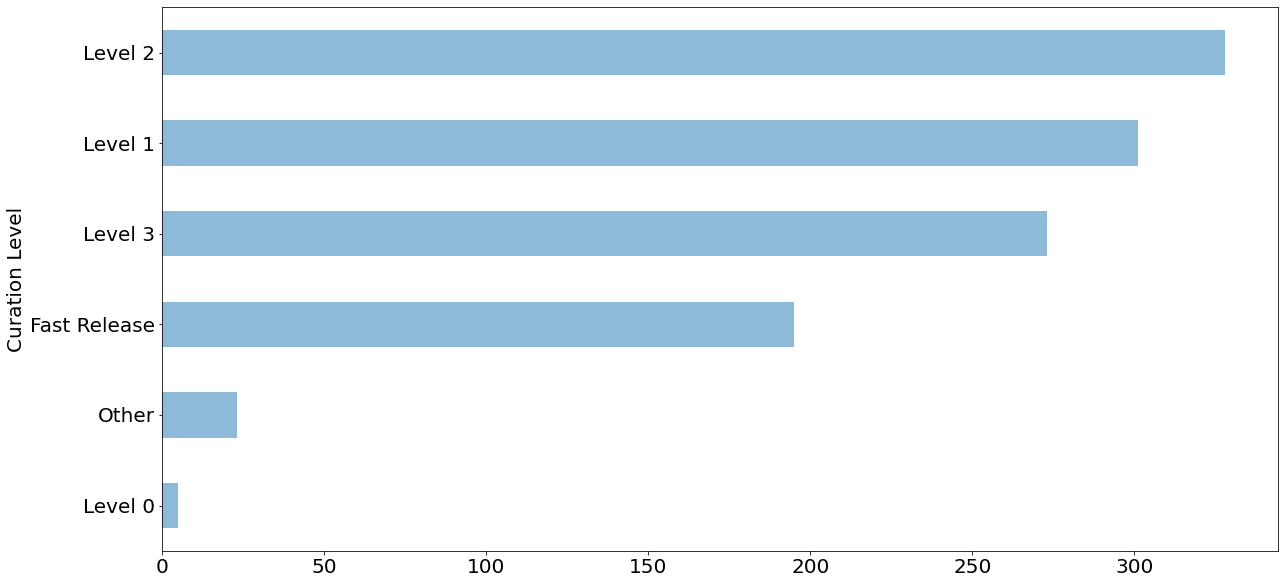

In [29]:
ax = (df_study['CURATION_LEVEL']
      .value_counts().sort_values(ascending=True)
      .plot.barh(alpha=0.5,figsize=(20,10),fontsize=20));
plt.ylabel('Curation Level', fontsize=20)
fig = ax.get_figure()
fig.savefig('../figures/cur_level.pdf', format="pdf")

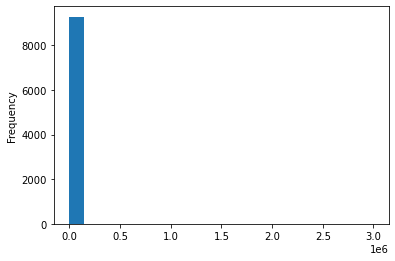

In [13]:
df_study['TOTAL_VARS'].plot.hist(bins=20);

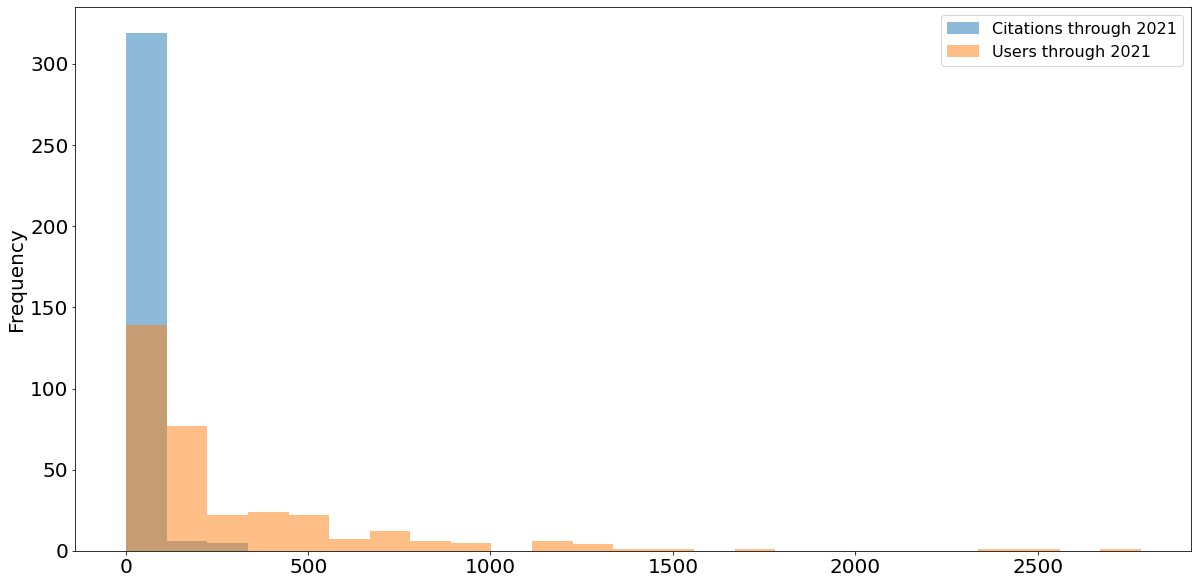

In [14]:
df_cit_down = df_study[df_study['USERS_TO_20210511'].notnull()&df_study['CITATIONS_TO_20211116'].notnull()]
df_cit_down = df_cit_down[['CITATIONS_TO_20211116','USERS_TO_20210511']]

ax = df_cit_down.plot.hist(bins=25, alpha=0.5,figsize=(20,10),fontsize=20);
plt.ylabel('Frequency', fontsize=20)
plt.legend(['Citations through 2021', 'Users through 2021'], fontsize=16)
fig = ax.get_figure()
fig.savefig('../figures/study_use.pdf', format="pdf")

Papers

In [15]:
df_paper = pd.read_csv('../data_transform/ICPSR_PAPERS.csv')
df_paper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94794 entries, 0 to 94793
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   REF_ID       94794 non-null  int64 
 1   DOI          43102 non-null  object
 2   TITLE        94789 non-null  object
 3   AUTHORS      94793 non-null  object
 4   SEC_TITLE    78217 non-null  object
 5   RIS_TYPE     94794 non-null  object
 6   FUNDER       490 non-null    object
 7   YEAR_PUB     94794 non-null  int64 
 8   DATE_INPUT   94118 non-null  object
 9   SERIES_NUMS  2338 non-null   object
 10  STUDY_NUMS   94794 non-null  object
 11  DIM_ID       40646 non-null  object
 12  DIM_LINKOUT  14982 non-null  object
dtypes: int64(2), object(11)
memory usage: 9.4+ MB


In [16]:
print(f"Unique papers: {df_paper.REF_ID.nunique()}")

Unique papers: 94755


In [17]:
with_doi = len(df_paper[df_paper.DOI.notna()])
no_doi = len(df_paper[df_paper.DOI.isna()])

print(f"Papers with a DOI: {with_doi}")
print(f"Papers without a DOI: {no_doi}")
print(round(with_doi/df_paper.REF_ID.nunique(),2))

Papers with a DOI: 43102
Papers without a DOI: 51692
0.45


In [18]:
print(df_paper[df_paper['YEAR_PUB']!=0].YEAR_PUB.min()) # summarize temporal coverage excluding items recoded to 0
print(df_paper['YEAR_PUB'].max())
print(df_paper['YEAR_PUB'].max() - df_paper[df_paper['YEAR_PUB']!=0].YEAR_PUB.min())

1963
2022
59


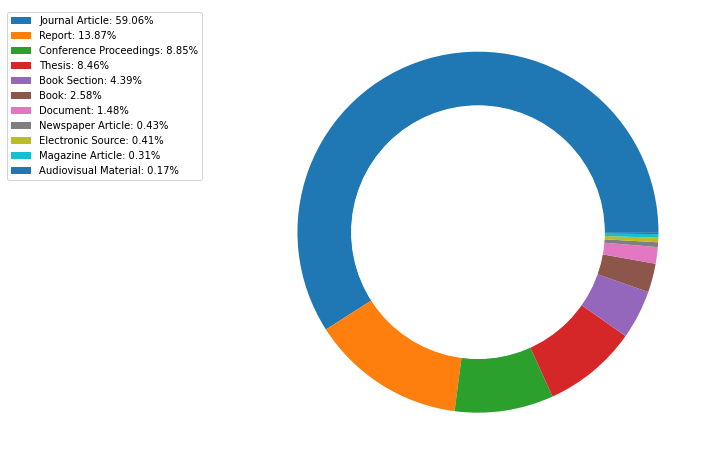

In [19]:
full_names = ['Journal Article', 
              'Report', 
              'Conference Proceedings', 
              'Thesis', 
              'Book Section', 
              'Book', 
              'Document', 
              'Newspaper Article', 
              'Electronic Source', 
              'Magazine Article',
              'Audiovisual Material']

ris_types = pd.DataFrame(df_paper['RIS_TYPE'].value_counts()).reset_index()
ris_types['full_names'] = full_names
ris_types['percent'] = (round((ris_types['count']/ris_types['count'].sum())*100,2)) # get percent of RIS types
ris_types['label'] = ris_types['full_names'].astype('str') + ": " + ris_types['percent'].astype('str')  + "%"

size = df_paper['RIS_TYPE'].value_counts().sort_values(ascending=False)
# labels = (round((ris_types/ris_types.sum())*100,2))

my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(10,10))
# plt.pie(size, labels=size.index)
plt.pie(size)
plt.legend(labels=ris_types['label'], bbox_to_anchor=(-0.1, 1.),fontsize=10)

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout()
plt.savefig('../figures/ris_type.pdf', format="pdf")
plt.show()

In [20]:
round((df_paper[df_paper['DIM_ID']!=''].DIM_ID.count()/df_paper['REF_ID'].count())*100,2) # items with Dimensions ID

42.88

In [21]:
round((df_paper[df_paper['DIM_LINKOUT']!=''].DIM_LINKOUT.count()/df_paper['REF_ID'].count())*100,2) # items with full text link

15.8

<ipython-input-22-4e30d8032ed6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decs['Decade'] = (10 * (df_decs['YEAR_PUB'] // 10))


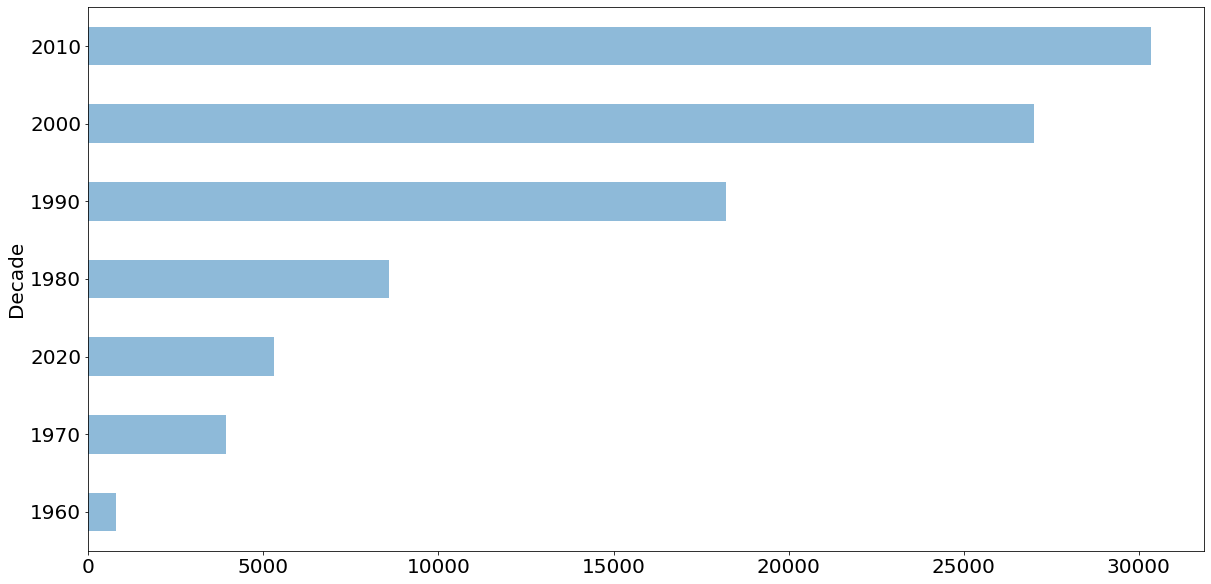

In [22]:
df_decs = df_paper[df_paper['YEAR_PUB']>1962]
df_decs['Decade'] = (10 * (df_decs['YEAR_PUB'] // 10))
# ax = df_decs['Decade'].value_counts().sort_values().plot.barh(figsize=(20,10));
ax = (df_decs['Decade']
      .value_counts()
      .sort_values(ascending=True)
      .plot
      .barh(alpha=0.5,figsize=(20,10),fontsize=20));
plt.ylabel('Decade', fontsize=20)
fig = ax.get_figure()
fig.savefig('../figures/pub_dec.pdf', format="pdf")

Studies with one or more citations

In [23]:
df_paper['STUDY'] = df_paper.STUDY_NUMS.str.split(";")
exploded_bib = df_paper.explode("STUDY")
exploded_bib["STUDY"] = exploded_bib["STUDY"].astype(str).astype(float)

df_stud_bib = exploded_bib.merge(df_study, on='STUDY')

print("Studies with at least one citation:",df_stud_bib.STUDY.nunique())
print("Studies without any citation:",(df_study.STUDY.nunique() - df_stud_bib.STUDY.nunique()))

print("Percent of studies with at least one citation:", df_stud_bib.STUDY.nunique()/df_study.STUDY.nunique())
print("Percent of studies without any citations:", 1-(df_stud_bib.STUDY.nunique()/df_study.STUDY.nunique()))

df_stud_bib.STUDY.nunique()+(df_study.STUDY.nunique() - df_stud_bib.STUDY.nunique()) == df_study.STUDY.nunique() #validate

Studies with at least one citation: 8025
Studies without any citation: 2580
Percent of studies with at least one citation: 0.7567185289957568
Percent of studies without any citations: 0.24328147100424324


True

Curation actions

In [24]:
df_action = pd.read_csv('../data_transform/ICPSR_CURATION_LOGS.csv')
df_action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13425 entries, 0 to 13424
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STUDY         13425 non-null  int64  
 1   ACTION_LABEL  13425 non-null  object 
 2   LOG_HRS       12216 non-null  float64
 3   STUDY_HRS     13425 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 419.7+ KB


In [25]:
df_action['ACTION_LABEL'].unique()

array(['Metadata-study-level', 'Quality-checks', 'Non-curation',
       'Initial-review-and-planning', 'Communication-for-study',
       'Transformation-of-data', 'Documentation', 'Other'], dtype=object)

In [26]:
curation_studies = df_action['STUDY'].unique().tolist()
mask = df_study['STUDY'].isin(curation_studies)
subset = df_study.loc[~mask]

print(subset['RELEASE_DATE'].min()) # note: document system-level issue with earliest release date
print(subset['RELEASE_DATE'].max())

1984-03-18 00:00:00
2021-10-28 11:29:31


In [27]:
print(f"Unique curation logs: {df_action['STUDY'].nunique()}")
print(f"Percent of studies with curation info: {round((df_action['STUDY'].nunique()/df_study['STUDY'].nunique())*100,1)}")

Unique curation logs: 563
Percent of studies with curation info: 5.3
